In [1]:
#from google.colab import drive
#drive.mount('/content/drive/')
root = ''

In [2]:
## Check files inside data folder 
#! ls '/content/drive/My Drive/Colab Notebooks/data'

# INF8111 - Fouille de données / Data Mining
## Automne 2020 - TP3 - Fouille de réseaux sociaux / Mining of social networks
### Membres de l'équipe / Team members
    - Membre 1
    - Membre 2
    - Membre 3


## Instructions de remise / Submission

Vous devez remettre dans la boîte de remise sur moodle:

1. ce fichier nommé TP3\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Assurez-vous que tous les résultats soient lisibles lorsque le notebook est ouvert.

Tout devra être remis avant le **23 juin 2021 à 23h55**. Tout travail en retard sera pénalisé d’une valeur de 10\% par jour ouvrable de retard.

## Barème

Partie 1: 14 points

Partie 2: 6 points

Pour un total de 20 points.


---

## Submission

You must put back in the submission box on moodle:

1. this file renamed TP3\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Make sure that all results are there when you open your notebook.

Everything must be submitted before **June 26th 2021 à 23h55**. Any late work will be penalized with a value of 10% per open day of delay.

## Barème
Part 1: 14 points

Part 2: 6 points

For a total of 20 points.


## Réseaux sociaux / Social Networks
Les réseaux sociaux occupent une grande partie de la vie humaine. Chaque personne appartient tout le long de sa vie à différentes communautés. Avec le rassemblage de ces informations sur les différentes plateformes en ligne de réseaux sociaux, les analystes de données ont voulu exploiter ces données. C'est un domaine relativement nouveau qui est en pleine croissance avec plusieurs impacts sur plusieurs aspects tels que la publicité et les systèmes de recommandation. 

### But
Le but de ce TP est de vous donner un aperçu de l'analyse d'un réseau social.

Dans la première partie, vous implémenterez un algorithme de détection de communautés dans un réseau social nommé LPAm+. Cet algorithme a été proposé par [X. Liu et T. Murata en 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

Dans la deuxième partie, vous trouverez les personnes avec le plus d'influence dans leur réseau social. 

Pour les deux parties, nous vous fournissons les CSV contenant les réseaux sociaux à analyser.


---

## Social networks
Social networks are a major component of the human life. Each person belongs throughout their life to different communities. With the aggregation of information on various online social media platforms, data analysts were interested in exploiting its data. It is a relatively new field that is growing with impacts on several aspects such as advertising and recommendation systems.


### Goal
The purpose of this lab is to give you an overview of social network analysis.

In the first part, you will implement an algorithm for detecting communities in a social network called LPAm+. This algorithm was proposed by [X. Liu and T. Murata in 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

In the second part, you will find the people with the most influence in their social network.

For both parts, we provide you with the CSV containing the social networks to be analysed.

# 1. LPAm+ (14 points)

## Détection de communauté
La détection de communauté dans un réseau social est une manipulation fréquente lors de l'analyse d'un réseau. Une méthode de clustering est utilisée pour rassembler les personnes dans des communautés selon les liens entre eux. 

## LPAm+
Dans cette partie, vous implémenterez l'algorithme LPAm+ pour détecter les communautés parmi les personnages de Games of Thrones. Vous devez utiliser les CSV *nodes* et *edges* pour cela. 

Cet algorithme consiste à propager les étiquettes dans le réseau selon une règle d'évaluation optimisant la modularité du réseau. Lorsque l'algorithme atteint un optimum local, il regarde s'il peut combiner deux communautés pour augmenter la modularité du réseau. L'algorithme choisit toujours la combinaison la plus avantageuse. Si une combinaison est trouvée, la propagation des étiquettes est refaite. L'algorithme continue tant qu'elle peut améliorer la modularité. Vous pouvez lire l'article mentionné plus haut pour plus de détails, mais cela n'est pas nécessaire puisque vous allez être guidé tout le long du TP. 

Pour faciliter la représentation du réseau, nous vous proposons d'utiliser le package networkx. La documentation est disponible [ici](https://networkx.github.io/documentation/stable/tutorial.html).



---

# 1. LPAm+ (14 points)


## Community detection
Community detection in a social network is a frequent manipulation when analysing a network. A clustering method is used to bring people together in communities according to the links between them.


## LPAm+
In this part, you will implement the LPAm+ algorithm to detect the communities among the characters of Games of Thrones. You must use the nodes and edges csv for this.

This algorithm consists in propagating the labels in the network according to an evaluation rule optimizing the modularity of the network. When the algorithm reaches a local optimum, it checks whether it can combine two communities to increase the modularity of the network. The algorithm always chooses the most advantageous combination. If a combination is found, the propagation of the labels is redone. The algorithm continues until it is no longer able to increase modularity. You can read the article mentioned above for more details, but you do not need to, as you will be guided throughout the TP.


To help you represent a network, we suggest that you use the networkx package.You can read more about the package [here](https://networkx.github.io/documentation/stable/tutorial.html).

In [3]:
# vous pouvez bien sûr utiliser anaconda pour installer les packages
!pip install --user numpy
!pip install --user pandas
!pip install --user matplotlib
!pip install --user networkx


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [10]:
import numpy as np
import networkx as nx
import random
import itertools
import math
import copy

random.seed(42)
np.random.seed(42)

class LPAmPlus:
    """
    Contructor
    """

    def __init__(self, graph):
        """
        graph gives the graph on which the algorithm will be applied;
        """
        self.graph = graph

        """
        Assign a label to each node
        """
        #TODO
        for node_id,node in enumerate(self.graph.nodes):
            self.graph.nodes[node]['label'] = node_id
            
        """
        labels gives all the communities present in the network
        """
        self.labels = []
        for node in list(self.graph.nodes):
            self.labels.append(self.graph.nodes[node]['label'])

    """
    Term to optimize when replacing labels
    """

    def label_evaluation(self, current_node, new_label):
        #TODO
        lmax = 0
        current_node_index = list(self.graph.nodes).index(current_node)
        
        modularity_matrix = nx.linalg.modularity_matrix(self.graph)
        
        for u_index, node_u in enumerate(self.graph.nodes):
            kron = new_label == self.graph.nodes[node_u]['label']
            B = modularity_matrix[u_index,current_node_index]
            if node_u != current_node:
                lmax += kron*B
        return lmax
      

    """
    Function to choose the new label for a node
    """
    def update_label(self, current_node):
        #TODO
        label_list = []
        lmax = -np.inf
        for label in self.labels:
            calculated_l_sum = self.label_evaluation(current_node,label)
            if lmax == calculated_l_sum:
                label_list.append(label)
            elif lmax < calculated_l_sum: 
                lmax = calculated_l_sum
                label_list = [label]
        
        self.graph.nodes[current_node]['label'] = label_list[random.randrange(0, len(label_list))]
        
        label_dict = {}
        for node in self.graph.nodes:
            label = self.graph.nodes[node]['label']
            if label not in label_dict:
                label_dict[label] = ''
        
        for label in self.labels:
            if label not in label_dict:
                self.labels.remove(label)
  
        
        
        
      

    """
    Function that calculates the current modularity of the network
    """

    def modularity(self):
        Q = 0
        m = len(self.graph.edges)
        modularity_matrix = nx.linalg.modularity_matrix(self.graph)
        
        for u,node_u in enumerate(self.graph.nodes):
            for v,node_v in enumerate(self.graph.nodes):
                    B = modularity_matrix[u, v]
                    kron = self.graph.nodes[node_u]['label'] == self.graph.nodes[node_v]['label']
                    Q += B*kron
        return Q /(2*m)
    
    
    """
    Function that applies the LPAm algorithm on the network
    """

    def LPAm(self):
        #TODO
        current_modularity = -np.Inf
        new_modularity = self.modularity()
        
        while(current_modularity < new_modularity):
            for node in self.graph.nodes:
                self.update_label(node)
                current_modularity = new_modularity
                new_modularity = self.modularity()

            
        

   
    """
    Function that find which communities to combine and combine them
    """
    def merge_communities(self):
        community_should_merge = False
        current_graph = copy.deepcopy(self.graph) 
        highest_modularity = self.modularity()
        merged_labels = []
        
        for u in range(0, len(self.labels) - 1):
            label_u = self.labels[u]
            for v in range(u + 1, len(self.labels)):
                label_v = self.labels[v]
                for node in self.graph.nodes:
                    if (self.graph.nodes[node]['label'] == label_v):
                        self.graph.nodes[node]['label'] = label_u
                        
                calculated_modularity = self.modularity()
                self.graph = copy.deepcopy(current_graph)
                
                # If the combination has same or increased we merge them to reduce communities
                if (calculated_modularity < highest_modularity): 
                    continue
                
                highest_modularity = calculated_modularity
                merged_labels = [label_u, label_v]
                community_should_merge = True
              
        
        if not community_should_merge :
            return False
        
        for node in self.graph.nodes:
            if (self.graph.nodes[node]['label'] == merged_labels[0]):
                self.graph.nodes[node]['label'] = merged_labels[1]
        self.labels.remove(merged_labels[0])        
        
        return community_should_merge
    
    """
    Function that applies the LPAm+ algorithm on the network
    """

    def find_communities(self):
        self.LPAm()
        
        while self.merge_communities():
           pass

    

### 1.1 Dataset (1 point)

Nous vous avons fourni les CSV pour toutes les saisons de Games of Thrones. Vous devez maintenant représenter ces réseaux en utilisant les deux CSV fournis pour chaque saison: un pour les sommets et un pour les arêtes. 


#### Implémentation
1. Implémentez  la fonction  *`load_unweighted_network`*. Cette fonction retourne le réseau non dirigé et sans poids.

Utilisez la fonction `test_load` pour vérifier votre implémentation de la fonction. Ce test utilise un petit toy dataset. Vous devriez avoir quelque chose de similaire (data/picture.png):
![title](data/picture.png)


---
We have provided you with the csv for all the seasons of Games of Thrones. You must now represent each of those networks in code using two csv for each season: the one for the nodes and the one for the edges.


#### Implementation
1. Implement the function *`load_unweighted_network`*. This function returns a undirected and unweighted graph.

Use the function `test_load` to verify your implementation of the function. This test use a toy dataset. You should obtain a result similar to this (data/picture.png):
![title](data/picture.png)


In [77]:
import csv
import pandas as pd
import networkx as nx


def load_unweighted_network(node_csv, edge_csv):
    #TODO
    nodes_data = pd.read_csv(node_csv)
    edges_data = pd.read_csv(edge_csv)
    network = nx.Graph()
    
    nodes = []
    for i in range(0, len(nodes_data.Id)):
        new_node = (nodes_data.Id[i], {"Name": nodes_data.Name[i], "Community": nodes_data.Community[i]})
        nodes.append(new_node)

    network.add_nodes_from(nodes)
        
    
    for i in range(0, len(edges_data.Target)):
         network.add_edge(edges_data.Target[i],edges_data.Source[i])
    
    return network

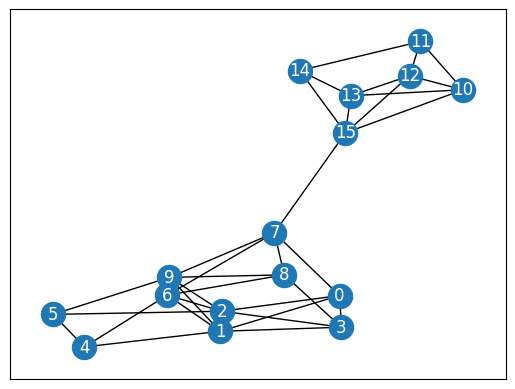

In [78]:
import matplotlib.pyplot as plt
def test_load():
    network = load_unweighted_network("data/toy-nodes.csv", "data/toy-edges.csv")
    nx.draw_networkx(network,font_color='white')
    plt.show()

test_load()

### 1.2  Modularité / Modularity (2 point)

La modularité $Q$ du réseau est une mesure importante pour l'algorithme: elle permet de savoir si l'algorithme a atteint un optimum local. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$ 

- m: le nombre d'arêtes
- l: l'étiquette du sommet
- u, v: des sommets dans le réseau
- B: la matrice de modularité où chaque élément vaut $A_{uv} - P_{uv}$
- $A_{uv}$: vaut 1 si il y une arête entre u et v sinon 0
- $P_{uv}$: la probabilité qu'il y ait une arête entre u et v selon le modèle nul  $$P_{uv}=\frac{degree(u)*degree(v)}{2m}$$
- $\delta(l_u,l_v)$: delta de Kronecker, vaut 1 si les deux labels sont identiques sinon 0

#### Implémentation
1. Implémentez  la fonction  `modularity`  dans LPAmPlus. Cette fonction retourne la modularité du réseau. Vous pouvez utiliser la fonction `nx.linalg.modularity_matrix` de networkx pour calculer la matrice B. **N.B:** Networkx permet d'ajouter du data sur les sommets pour garder des informations sur le node. Les nodes agissent comme des dictionnaires.

Utilisez la fonction `test_modularity` pour vérifier votre implémentation de la fonction. Vous devriez obtenir une modularité d'environ 0.413.

---

The modularity $Q$ of the network is an important measure for the algorithm. The algorithm uses it to determine if it reached a local optimum or not. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$ 

- m: number of edges
- l: node's label
- u, v: nodes in the graph
- B: modularity matrix where each element is $A_{uv} - P_{uv}$
- $A_{uv}$: is 1 if there is an edge between u and v else 0
- $P_{uv}$: probability that there is an edge between u and v following the null model $$P_{uv}=\frac{degree(u)*degree(v)}{2m}$$
- $\delta(l_u,l_v)$: Kronecker's delta, is 1 if labels are the same else 0

#### Implementation
1. Implement the function `modularity` in the class LPAmPlus. This function returns the modularity of the network. You can use the function `nx.linalg.modularity_matrix` from networkx to calculate B. **N.B:** You can add data to nodes with Networkx to store information about the node. You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.

Use the function `test_modularity` to test your implementation. You should have a modularity of 0.413.

In [79]:
def test_modularity():
    social_network = load_unweighted_network(root+"data/toy-nodes.csv", root+"data/toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.labels = [0, 1]
    for i in range(0, 16):
        lpam.graph.nodes[i]['label'] = 0 if i < 10 else 1
    print("Modularity: {:.3f}".format(lpam.modularity()))

test_modularity()

Modularity: 0.413


<class 'networkx.utils.decorators.argmap'> compilation 13:5: FutureWarning: modularity_matrix will return a numpy array instead of a matrix in NetworkX 3.0.


### 1.3 Règle de modification des étiquettes / Updating rule for the labels (3 point)

Comme mentionné plus haut, l'algorithme est fortement basé sur son optimisation de la modularité. Il vous est maintenant demandé d'implémenter le terme à optimiser. La nouvelle étiquette $l_x^{new}$ correspond à l'étiquette pour laquelle la somme donne la plus grande valeur.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: le nombre de sommets
- m: le nombre d'arêtes
- l: une étiquette possible pour le sommet x
- x: le sommet qu'on évalue en ce moment
- u: un autre sommet dans le réseau (commence à 1, car on exclut le sommet x)
- B: la matrice de modularité où chaque élément vaut $A_{ux} - P_{ux}$
- $A_{ux}$: vaut 1 si il y une arête entre u et x sinon 0
- $P_{ux}$: la probabilité qu'il y ait une arête entre u et x selon le modèle nul  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: delta de Kronecker, vaut 1 si les deux labels sont identiques sinon 0


#### Implémentation
1. Implémenter la fonction `label_evaluation`. Cette fonction retourne la valeur du terme à optimiser. Vous pouvez utiliser la fonction `linalg.modularity_matrix` de networkx pour calculer la matrice B. Il est normal qu'il y ait une ressemblance avec le calcul de la modularité selon la définition que vous avez prise. `new_label` correspond donc à un $l$ possible dans le terme.
2. Implémenter la fonction `update_label`. Cette fonction choisit la nouvelle étiquette pour le sommet actuel. En cas d'égalité, la fonction choisit une étiquette au hasard parmi les meilleurs. N'oubliez pas d'enlever les étiquettes désuètes du paramètre `labels`. **N.B:** Il est possible que la meilleure étiquette soit celle actuelle du sommet.

Networkx permet d'ajouter du data sur les sommets. Les sommets sont des dictionnaires dans le graphe.

---

As mentioned above, the algorithm is strongly based on its optimization of modularity. You are now asked to implement the term to optimize. The new label $l_x^{new}$ corresponds to the label for which the sum gives the greatest value.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: number of nodes
- m: number of edges
- l: a possible label for the node x
- x: current node being evaluated
- u: another node in the network (starts at 1, because we exclude the node x)
- B: modularity matrix where each element is $A_{ux} - P_{ux}$
- $A_{ux}$: is 1 if there is an edge between u and x else 0
- $P_{ux}$: the probability that there is an edge between u and x  following the null model  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: Kronecker's delta, is 1 if labels are the same else 0


#### Implementation
1. Implement the function `label_evaluation`. This function returns the value for the term to optimize. You can use the function `linalg.modularity_matrix` from networkx to calculate B. It is normal if there is a similarity with the modularity depending on the definition you took. `new_label` represent a possible $l$ in the term.
2. Implement the function `update_label`. This function chooses the new label for the current node. If there is more than one label with the max value, the function chooses randomly one amoung those. Don't forget to remove the unused labels from the `labels` attribute. **N.B:** The best label can be the node's current label. 

You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.



### 1.4 LPAm (2 points)

Vous pouvez maintenant implémenter l'algorithme LPAm. Cet algorithme est le prédécesseur de LPAm+ puisque LPAm+ a été crée pour contourner une faiblesse de LPAm.  LPAm est un algorithme de propapagation d'étiquettes basé sur la modularité. Il commence par donner une étiquette unique à chaque sommet. Il explore par la suite tous les sommets et change leur étiquette selon la fonction d'évaluation que vous avez implémentée plus tôt. L'algorithme continue la propagation d'étiquette à travers tous les sommets jusqu'à un optimun de la modularité.

#### Implémentation
1. Ajouter les étiquettes initiales aux sommets du graphe dans la fonction `__init__`. Il faut que chaque sommet soit dans sa propre communauté au début de l'algorithme. Initialiser le paramètre `labels` pour qu'il contient la liste des étiquettes présentes dans le réseau.

2. Implémenter l'algorithme LPAm dans la fonction `LPAm`. Assurez-vous de toujours augmenter la modularité lors de vos changements d'étiquettes. N'oubliez pas de garder le paramètre `labels` à jour à fur et à mesure lors de vos changements pour ne pas évaluer plusieurs fois la même étiquette.

Utilisez la fonction `test_lpam` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.399 avec 4 communautés.

---

You can now implement the LPAm algorithm. This algorithm is the predecessor of LPAm+ since LPAm+ was created to overcome LPAm's weakness. LPAm is a label probagation algorithm based on modularity. It begins by giving a unique label to each node. It then explores all the nodes and changes their label according to the evaluation function that you implemented earlier. The algorithm continues until it can no longer improve the modularity of the network.

#### Implementation
1. Add the initial labels to the nodes in the graph in the function `__init__`. Each nodes has to be in their own community in the beginning. Initialise `labels` with the current list of labels present in the graph.

2. Implement the LPAm algorithm in the function`LPAm`. Make sure that all your labels changes improve the modularity. Don't forget to keep your `labels` parameter is kept up-to-date so that you dont evaluate the same label multiple times or unused labels.

Use the function `test_lpam` to verify your implementation. You should have a modularity of 0.399 with 4 communities.

In [80]:
def test_lpam():
    social_network = load_unweighted_network(root+"data/toy-nodes.csv", root+"data/toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.LPAm()
    print("Modularity: {:.3f}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam()

Modularity: 0.399
Communities: [3, 5, 8, 11]


<class 'networkx.utils.decorators.argmap'> compilation 13:5: FutureWarning: modularity_matrix will return a numpy array instead of a matrix in NetworkX 3.0.


### 1.5 LPAm+ (3 point)

Vous pouvez maintenant implémenter LPAm+ au complet. LPAm+ est une amélioration de LPAm. Lorsque LPAm tombe dans un optimum local, LPAm+ essaye de combiner deux communautés pour augmenter la modularité et ainsi sortir du optimum local. LPAm+ choisit la combinaison qui augmente le plus la modularité et recommence la propagation d'étiquette jusqu'au prochain optimum local où il va reessayer de combiner des communautés. L'algorithme continue jusqu'à qu'il ne peut plus augmenter la modularité.

#### Implémentation
1. Implémentez  la fonction  `merge_communities`. Cette fonction regarde si combiner des communautés augmente la modularité et combine le meilleur choix. Elle retourne True si une combinaison a été faite sinon False (aucune combinaison augmente la modularité).
2. Implémenter `find_communities`. Cette fonction applique l'algorithme LPAm+ sur le réseau en utilisant les fonctions `LPAm` et `merge_communities`.

Utilisez la fonction `test_lpam_plus` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.413 et 2 communautés.

---

You can now fully implement LPAm+. As said before LPAm+ is an amelioration of LPAm. The issue with LPAm is that it stops when it finds a local optimun. To prevent that, LPAm+ tries to combine two communities to increase modularity and escape the local optimun. LPAm+ chooses the combination that most increases modularity and restart the label's propagation until the next local optimum where it will try to combine two communities again. The algorithm continues until it can no longer increase modularity.

#### Implementation
1. Implement the function  `merge_communities`. This function check if combining communities improve the modularity and combine the best choice. It returns True if a combinaison was made else False (no combination increase the modularity).
2. Implement the LPAM+ algorithm in the function `find_communities` using the fonctions `LPam` and `merge_communities`.

Use the function `test_lpam_plus` to verify your implementation. You should end with a modularity of 0.413 and 2 communities.

In [81]:
def test_lpam_plus():
    social_network = load_unweighted_network(root+"data/toy-nodes.csv", root+"data/toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.find_communities()
    print("Modularity: {:.3f}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam_plus()

Modularity: 0.413
Communities: [8, 11]


<class 'networkx.utils.decorators.argmap'> compilation 13:5: FutureWarning: modularity_matrix will return a numpy array instead of a matrix in NetworkX 3.0.


### 1.6 GOT dataset (3 points)

Rouler votre algorithme sur les données de Games of Thrones de chaque saison et comparer ce que vous obtenez et les vraies communautés. Le ground truth se trouve dans la colonne Community des csv. Des liens sont présents entre des personnages lorsque: 
- Personnage A parle directement après Personnage B
- Personnage A parle de Personnage B
- Personnage C parle de Personnage A et Personnage B
- Personnage A et Personnage B font une action ensemble dans une scène (ex: quittent les lieux, A regarde B, sont assis à une table, etc)
- Personnage A et Personnage B apparaissent ensemble dans une scène

Commencez par calculer le RI (Rand index) de vos résultats. $$ RI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n: le nombre de sommets
- TP: True positive soit le nombre de paires d'éléments qui se trouvent dans la même communauté dans vos résultats et dans le ground truth
- TN: True négative soit le nombre de paires d'éléments qui se trouvent dans des communautés différentes dans vos résultats et dans le ground truth
- FP: False positive soit le nombre de paires d'éléments qui se trouvent dans la même communauté dans vos résultats mais qui sont dans des communautés différentes dans le ground truth
- FN: False négative soit le nombre de paires d'éléments qui se trouvent dans des communautés différentes alors qu'ils sont dans la même communauté dans le ground truth


**N.B**: Ce n'est pas le nom des communautés que vous avez trouvé qui importante mais leur composition. Autrement dit, un TP est si le sommet a et le sommet b se trouve dans la même communauté dans vos résultats et dans le ground truth.


Répondez aux questions suivantes. Elles servent comme piste de réflexion pour votre analyse.

- L'algorithme performe-t-il bien sur toutes les saisons ou pour certaines seulement? 
- Expliquez pourquoi vous avez obtenu ces résultats en analysant la formation des communautés dans chaque saison. Quelles particularités favorisent des bons résultats? Quelles particularités nuisent à l'algorithme?

Vous pouvez faire les manipulations que vous voulez pour mieux présenter vos résultats et mieux appuyer vos affirmations. 

---

Run your algorithm over the Games of Thrones data from each season and compare what you get and the real communities. The ground truth is found in the Community column in the csv. Links are found between characters A and B when:
- Character A talks directly after Character B
- Character A talks about Character B
- Character C talks about Character B and A
- Character A and Character B does an action together in a scene (ex: leave the room, A looks toward B, are seated together at a table, etc)
- Character A and Character B are both present in a scene

Start by calculating the RI (Rand index) of your results. $$ RI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n: number of nodes
- TP: True positive the number of pairs of elements that are in the same community in your results and in the ground truth
- TN: True negative the number of pairs of elements that are in different communities in your results and in the ground truth
- FP: False positive the number of pairs of elements which are in the same community in your results but which are in different communities in the ground truth
- FN: False negative the number of pairs of elements which are in different communities in your results but which are in the same community in the ground truth

**N.B:** What matters here is the composition of the communities you found not the names. A TP is when the node a and the node b are both in the same communities in your result and in the ground truth.

Answer the following questions. They are guides for your analysis.

- Does the algorithm perform well on all seasons or for some only? 
- Explain why you obtained those results by analysing the communities from each season. Which particularities offer better results? Which hinder the algorithm?

You can do the manipulations you want to better present your results and better support your statements.

#### Résultats / Results

In [174]:
# Mettez votre code ici
# Insert your code here
from itertools import combinations


def calculate_RI(LPAm):
    FP = 0
    FN = 0
    TP = 0
    TN = 0
    for node in combinations(list(LPAm.graph.nodes),2):
        character_A = LPAm.graph.nodes[node[0]]['label']
        character_B = LPAm.graph.nodes[node[1]]['label']
        community_A = LPAm.graph.nodes[node[0]]['Community']
        community_B = LPAm.graph.nodes[node[1]]['Community']
        TP +=  (character_A == character_B) and (community_A == community_B)
        TN +=  (character_A != character_B) and (community_A != community_B)
       
    total_combinations = comb(len(LPAm.graph.nodes),2)
    RI =  (TP + TN) /  total_combinations
    return RI

def calculate_season():
    for i in range(1,9):
        nodes_csv = f"data/got-s{i}-nodes.csv"
        edges_csv = f"data/got-s{i}-edges.csv"
        
        network = load_unweighted_network(nodes_csv, edges_csv)
        lpam = LPAmPlus(network)
        lpam.find_communities()
        print("Season " + str(i))
        print("Rand Index: " + str(calculate_RI(lpam)))
        print("Modularity: " + str(lpam.modularity()))

        

In [ ]:
calculate_season()

<class 'networkx.utils.decorators.argmap'> compilation 13:5: FutureWarning: modularity_matrix will return a numpy array instead of a matrix in NetworkX 3.0.


Season 1
Rand Index: 0.9003174603174603
Modularity: 0.45236246727780977


<class 'networkx.utils.decorators.argmap'> compilation 13:5: FutureWarning: modularity_matrix will return a numpy array instead of a matrix in NetworkX 3.0.


Season 2
Rand Index: 0.9688711240310077
Modularity: 0.5687818591339395


<class 'networkx.utils.decorators.argmap'> compilation 13:5: FutureWarning: modularity_matrix will return a numpy array instead of a matrix in NetworkX 3.0.


Season 3
Rand Index: 0.9438891110222578
Modularity: 0.625734115331503


<class 'networkx.utils.decorators.argmap'> compilation 13:5: FutureWarning: modularity_matrix will return a numpy array instead of a matrix in NetworkX 3.0.


Season 4
Rand Index: 0.9514963880288958
Modularity: 0.5961998034070102


<class 'networkx.utils.decorators.argmap'> compilation 13:5: FutureWarning: modularity_matrix will return a numpy array instead of a matrix in NetworkX 3.0.


Season 5
Rand Index: 0.9837629967241134
Modularity: 0.6666411590654093


<class 'networkx.utils.decorators.argmap'> compilation 13:5: FutureWarning: modularity_matrix will return a numpy array instead of a matrix in NetworkX 3.0.


#### Analyse / Analysis

The results of Seasons 1-6 are excellent and as such, we can assume that we code is able to detect communities efficiently. In Seasons 7 & 8 the results are significantly worse. We can see that the Rand Index is lower than for the first 6 seasons and that modularity has decreased heavily. Since we generally try to maximize modularity to have the best community detection, it is concerning when modularity is low. It indicates that the program is having difficulty detecting communities. 

In Season 8, characters all belong in the same community which makes it extremely difficult to distinguish and identify seperate groups. As such, a low modularity and low Rand index is measured. 

In Season 7, characters are all subdivided into small communities. As we indicated earlier in our optimization to LPAm, we are seeking to merge communities if possible to increase modularity. In this season, it is very difficult to merge communities and as such we have a low measured modularity.

Seasons 1-6 have high scores due to low numbers of communities and similar relative sizes. This increases modularity and Rand index values. It is easier to identify and seperate characters into their respective communities and the results align with that.

Finally, seasons 2 and 6 have disconnected communities which are easily identified by the LPAm algorithm. This will also increase the modularity and Rand index value. 

These results show that Modularity and Rand index are linearly related. An increase in Modularity will also be accompanied with an increase in Rand Index. As such, we can assume they both measure similar indicators.


# 2. Personnages influents dans GOT / Influent character in GOT (6 points)

##  Analyse d'un réseau social 
Une autre analyse intéressante à faire avec un réseau social est de trouver les personnes influentes du réseau soit les personnes autour desquelles les gens du réseau se regroupent.

Il existe des mesures qui permettent de connaître ces personnes: les mesures de centralité. **Vous devez implémenter les mesures vous-même et ne pas utilisez les implémentations de `networkx` de ces mesures.** Pour vous aider lors de l'implémentation de ses mesures, un deuxième toy dataset vous est fourni. Il ressemble à ceci (data/picture2.png):
![title](data/picture2.png)

## GOT datasets
La série Games of Thrones est reconnue pour tuer ses personnages importants. Nous vous demandons de vérifier cette affirmation. Pour cette partie, vous devez utiliser tous les CSV donnés avec le TP (nodes, edges et deaths). Nous voulons que vous trouviez les personnages les plus influents de chaque saison et que vous les compariez avec la liste de personnages morts durant la saison.

---

##  Social network analysis

Another interesting analysis to do with a social network is to find the influential people in the network, ie the people around whom the people in the network gather.

There are measures which make it possible to know these people: the centrality measures. **You must implement those metrics yourselves. Do not use `networkx` implementation for the  tp.** To help you during the implementation of those measurements, a second toy dataset is provided to you. It looks like this (data/picture2.png): ![title](data/picture2.png)

## GOT datasets
The Games of Thrones series is known to kill its important characters. We ask you to verify this statement. For this part, you must use all the csv given with the TP (nodes, edges and deaths). We want you to find the most influential characters from each season and compare them with the list of dead characters during the season.


## 2.1 Centralité de degré / Degree centrality (1 point)

Une première mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de degré. Elle se calcule $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: un sommet dans le réseau
- n: le nombre de sommets
- degree: le nombre d'arêtes attachées au sommet

#### Implémentation
1. Implémenter la fonction `calculate_degree_centrality`. Cette fonction calcule la centralité de degré pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

Utilisez la fonction `test_degree_centrality` pour vérifier votre implémentation. Le sommet 1 devrait avoir la plus haute mesure de 0.4.

---

A first simple measure to find the importance of a node in a network is the degree centrality. It is calculated $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: a node in the network
- n: the number of nodes
- degree: the number of edges attached to the node

#### Implementation
1. Implement the function `calculate_degree_centrality`. This function calculates degree centrality for all nodes in the network and adds this measurement to each node.

Use the function `test_degree_centrality` to verify your implementation. The best node should be node 1 with 0.4.

In [103]:
def calculate_degree_centrality(social_network):
    num_of_nodes = len(social_network.nodes) - 1
    for node in social_network.nodes:
        social_network.nodes[node]['degree_centrality'] = social_network.degree[node] / num_of_nodes
    

In [104]:
def test_degree_centrality():
    social_network = load_unweighted_network(root+"data/toy-nodes.csv", root+"data/toy-edges.csv")
    calculate_degree_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'degree_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest degree centrality node: {} with {:.3f}".format(best_node, dict_centrality[best_node]))
test_degree_centrality()

Highest degree centrality node: 1 with 0.400


## 2.2 Centralité de proximité / Closeness centrality (1 point)

Une autre mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de proximité. Elle se calcule $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: un sommet dans le réseau
- AvDist: la moyenne de toutes les distances les plus courtes pour atteindre chaque sommet à partir du sommet i

#### Implémentation
1. Implémenter la fonction `calculate_closeness_centrality`. Cette fonction calcule la centralité de proximité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet. Considérer chaque arête comme une distance de 1.

**NB**: Utiliser la fonction `shortest_path()` du module Networkx pour trouver le chemin le plus court entre des sommets

Utilisez la fonction `test_closeness_centrality` pour vérifier votre implémentation. Le sommet 7 devrait avoir la plus haute mesure de 0.577.

---

Another simple measure for finding the importance of a node in a network is closeness centrality. It is calculated $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: a node in the network
- AvDist: the average of all shortest distances to reach each vertex from vertex i

#### Implementation
1. Implement the function `calculate_closeness_centrality`. This function calculates closeness centrality for all nodes in the network and adds this measurement to each node. Consider each edge as a distance of 1.

**NB**: Use the fucntion `shortest_path()` from Networkx to find the shortest path between two nodes.

Use the function `test_closeness_centrality` to verify your implementation. The best node should be node 7 with 0.577.

In [117]:
def calculate_closeness_centrality(social_network):
    num_of_nodes = len(social_network.nodes) - 1
    for node_u in social_network.nodes:
        avg_distance = 0
        for node_v in social_network.nodes:
            avg_distance += nx.shortest_path_length(social_network, node_u, node_v)
        social_network.nodes[node_u]['closeness_centrality'] = num_of_nodes / avg_distance

In [118]:
def test_closeness_centrality():
    social_network = load_unweighted_network(root+"data/toy-nodes.csv", root+"data/toy-edges.csv")
    calculate_closeness_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'closeness_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest closeness centrality node: {} with {:.3f}".format(best_node, dict_centrality[best_node]))

test_closeness_centrality()

Highest closeness centrality node: 7 with 0.577


## 2.3 Centralité d'intermédiarité / Betweeness centrality (1 point)

Une dernière mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité d'intermédiarité. Elle se calcule $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n-1}{2}}$$

- n: le nombre de sommets dans le réseau
- i: un sommet dans le réseau
- j,k: deux sommets dans le réseau excluant i
- $f_{jk}(i)$: la proportion des chemin le plus court partant du sommet j vers un sommet k (> j) passant par le sommet i 

#### Implémentation
1. Implémenter la fonction `calculate_betweenness_centrality`. Cette fonction calcule la centralité d'intermédiarité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

**NB**: Utilisez la fonction `all_shortest_paths()` de Networkx pour calculer tous les chemins simples les plus courts du graphe.

Utilisez la fonction `test_betweennes_centrality` pour vérifier votre implémentation. Le sommet 7 devrait avoir la plus haute mesure de 0.525.

---

A final simple measure to find the importance of a node in a network is the betweeness centrality. It is calculated $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n-1}{2}}$$

- n: the number of nodes in the network
- i: a node in the network
- j,k: two nodes in the network excluding i
- $f_{jk}(i)$: the proportion of shortest paths from vertex j to vertex k (> j) passing through node i

#### Implementation
1. Implement the function `calculate_betweenness_centrality`.This function calculates the betweenness centrality for all the nodes of the network and adds this measurement to each node.

**NB**: Use the fucntion `all_shortest_paths()` from Networkx to compute all shortest simple paths in the graph.

Use the function `test_betweennes_centrality` to verify your implementation. The best node should be the node 7 with 0.525.


In [170]:
def calculate_betweenness_centrality(social_network):
    num_of_comb = math.comb(len(social_network.nodes) - 1,2)
    for i in social_network.nodes:
        proportion = 0
        for j in social_network.nodes:
            for k in social_network.nodes:
                node_inside_path = 0
                if (k == i) or (j > k) : 
                    continue
                if j == i:
                    break
                shortest_path = list(nx.all_shortest_paths(social_network,j,k))
                total_paths = len(shortest_path)
                for path in shortest_path:
                    if i in path:
                        node_inside_path += 1
                proportion += node_inside_path / total_paths
                
        social_network.nodes[i]['betweenness_centrality'] = proportion / (num_of_comb)

In [171]:
def test_betweenness_centrality():
    social_network = load_unweighted_network(root+"data/toy-nodes.csv", root+"data/toy-edges.csv")
    calculate_betweenness_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'betweenness_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest betweenness centrality node: {} with {:.3f}".format(best_node, dict_centrality[best_node]))

test_betweenness_centrality()

Highest betweenness centrality node: 7 with 0.525


## 2.4 Analyse de vos résultats / Analysis of your results (3 points)

Executez les trois fonctions sur les réseaux de chaque saison et présentez le top 10 pour chaque mesure. **Les graphes des saisons 2, 4, 6 et 8 sont déconnectés. Dans ce cas, considérez la plus grande composante connexe**. Pour chaque saison, comparez le top 10 des mesures avec la liste de morts de la saison disponible dans les csv death. Répondez aux questions suivantes. Elles sont des pistes de réflexions pour votre analyse.

- Est-ce que le top 10 est suffisant pour trouver les morts importants de chaque saison? 
- Quelle mesure semble mieux prédire les morts? 
- Est-ce que la réputation de Games of Thrones de tuer plusieurs de ses personnages importants est fondée?

**N.B.:** Si vous ne connaissez pas la série et vous n'êtes pas sûrs quels morts peuvent être considérés importants, faites une recherche Google sur les personnages importants. Mentionnez votre démarche et la conclusion de vos recherches. Il n'y a pas une liste précise de morts importants. Évidemment si vous me dite que Daenerys n'est pas importante, je vais douter de vos recherches. Le but est de voir votre travail de réflexion et d'analyse des mesures de centralité. 

---

Run the three functions on the networks of each season and present the top 10 for each metric. **The season 2, 4, 6 and 8 graphs are disconnected. In that case, consider the largest connected component**. For each season, compare the top 10 metrics with the season's death list in the death csv. Answer the following questions. They are guide for your analysis.

- Is the top 10 enough to find the significant deaths of each season? 
- What measure seems to better predict the dead? 
- Is the reputation of Games of Thrones for killing many important characters founded?

**N.B:** If you don't know the series and aren't sure which deaths are considered important, do a Google research on the important characters in the series. Metion your research and the conclusion of it. There isn't a precise list of important deaths but if you tell me that Daenerys isn't important, I will doubt of the seriousness of your research. The goal is to see how your analyse the results giving by centrality metrics.

### Résultats / Results

In [ ]:
# Mettez le code pour présenter les résultats ici

### Analyse / Analysis

Here due to some students not having prior knowledge about GoT the answers can be various on if they got all major deaths or not. but they should reach the conclusion that GoT does kill important characters without fear. also for s7 the network being so connected, it is hard with only the top 10 to get death especially since that season has little deaths. As for the best metrics, that would depend on their results but I seem to get that each metric detect the same people with closeness on the lead a little bit.

# 3. DeepWalk (6 points)

##  Prédiction de lien 
Une autre analyse intéressante à faire avec un réseau social est la prédiction de liens. En regardant les liens actuels, il est possible de déterminer la probabilité qu'un lien apparaisse entre deux personnes dans le réseau. Pour ce TP, on vous demande d'implémenter le modèle de DeepWalk pour transformer les informations contenues dans le réseau et utiliser les **embeddings** pour prédire des liens.

## DeepWalk
Le modèle de DeepWalk est basé sur l'idée de traiter un réseau social comme un texte. On peut ainsi utiliser des techniques d'apprentissage machine pour du traitement de language. C'est un modèle en deux étapes. La première étape est de contruire le "dictionnaire" du réseau en explorant le voisinage de chaque sommet. La deuxième étape applique l'algorithme SkipGram sur le "dictionnaire" pour apprendre les *embeddings* pertinents. Le réseau est maintenant transformé et prêt à être traité par des techniques de NLP.

## GOT datasets
Nous vous demandons de choisir une saison de GoT excluant les **saisons 2, 4 et 6** pour tester votre implémentation du modèle. Enlever un lien fort, un lien moyen et un lien faible d'un sommet du réseau. Nous voulons voir si le modèle est capable de retourver ces 3 liens pour le sommet.

---
##  Link prediction
Another interesting graph manipulation is link prediction. By looking at current links between nodes, the probability of connecting two nodes can be predicted. In this part of the TP, we want you to implement the DeepWalk model to transform the information in the graph to be used with NLP models to predict links.

## DeepWalk
The DeepWalk model is based on the idea that social network can be treated like a text. As such, NLP techniques can be used to mine a social network. It is a 2 step model. The first step builds the network's dictionnary by exploring the network. The second step use the SkipGram algorithm to transform the dictionnary in embeddings. The network is then ready to be used by NLP techniques.

## GOT datasets
We ask you to choose a GOT season excluding **season 2, 4 and 6** to test your implementation. Remove a strong, medium and low link from one node. We want to see if the model can find those links again.



In [ ]:
import random as rnd
import numpy as np
import pandas as pd
import networkx as nx
import math


def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


class DeepWalk:
    def __init__(self, graph):
        self.graph = graph

        self.random_walks = []
        self.walk_length = None
        self.n_walk = None

        self.node_index = None
        self.training_data = None

        self.n_neurons = None
        self.epochs = None
        self.embeddings = None
        self.W1 = None
        self.loss = 0
        self.alpha = 0.00001
        self.init = None

    def random_walk(self, start_node):
        # TODO

    def build_random_walks_matrix(self, n_walk, walk_length):
        # TODO

    def create_training(self, window_size):
        # TODO

    def neural_network(self, epochs, n_neurons):
        self.n_neurons = n_neurons
        self.epochs = epochs
        self.init = math.sqrt(6 /
                              (self.graph.number_of_nodes() + self.n_neurons))
        self.embeddings = np.random.uniform(
            -self.init, self.init,
            (self.graph.number_of_nodes(), self.n_neurons))
        self.W1 = np.random.uniform(
            -self.init, self.init,
            (self.n_neurons, self.graph.number_of_nodes()))

        for x in range(1, epochs):
            self.loss = []
            for x_data, y_data in self.training_data:
                self._feed_forward(x_data)
                self._backpropagate(x_data, y_data)
                C = 0
                sub_loss = 0
                for m in range(self.graph.number_of_nodes()):
                    if y_data[m]:
                        sub_loss += -1 * self.u[m][0]
                        C += 1
                sub_loss += C * np.log(np.sum(np.exp(self.u)))
                self.loss.append(sub_loss)
            self.loss = np.mean(self.loss)
            print("epoch ", x, " loss = ", self.loss)
            self.alpha *= 1 / (1 + self.alpha * x)

    def skip_gram(self, window_size, epochs, n_neurons):
        self.create_training(window_size)
        self.neural_network(epochs, n_neurons)
        return self.embeddings, self.W1

    def _feed_forward(self, X):
        self.h = np.dot(self.embeddings.T, X).reshape(self.n_neurons, 1)
        self.u = np.dot(self.W1.T, self.h)
        self.y = softmax(self.u)
        return self.y

    def _backpropagate(self, x, t):
        # e is a vector V x 1
        e = self.y - np.asarray(t).reshape(self.graph.number_of_nodes(), 1)
        dLdW1 = np.dot(self.h, e.T)
        X = np.array(x).reshape(self.graph.number_of_nodes(), 1)
        dLdW = np.dot(X, np.dot(self.W1, e).T)
        self.W1 = self.W1 - self.alpha * dLdW1
        self.embeddings = self.embeddings - self.alpha * dLdW


## 3.1 Random-walk (2 points)
 
La première étape du modèle DeepWalk consiste à parcourir de manière aléatoire le réseau pour se construire un "dictionnaire" du réseau. La marche aléatoire dépend de deux paramètres: le nombre de marche(n_walk) et la longueur de la marche(walk_length). La longeur de la marche correspond au nombre de sommets dans la marche. En explorant le graphe, le modèle se construit des "contextes" à partir des liens entres les sommets. On peut considérer cela comme des phrases ou des extraits de phrases dans un texte. Deux sommets sont similaires si leur contexte le sont aussi.
 
 
Implémentation
1. Implémenter la fonction `random_walk`. Cette fonction retourne une marche aléatoire à partir du sommet donné en paramètre. **N.B:** considérer que les attributs `self.n_walk` et `self.walk_length` ont déjà été initialisé avec les bonnes valeurs.
2. Implémenter la fonction `build_random_walks_matrix`. Cette fonction trouve le voisinage de tous les sommets du réseau. Cela génère donc une matrice de taille (nbre_sommet * n_walk) x walk_length, car chaque sommet a n_walk marches aléatoires. Cette matrice est contenu dans `self.random_walks`.

Pour augmenter la composante aléatoire de la matrice, l'ordre des sommets doit aussi être aléatoire. Il ne faut pas que les n_walk premières rangées contiennent toutes les marches pour le même sommet du graphe ou que les marches suivent toujours le même ordre de sommets. 

---
The first step in the DeepWalk model is to create the dictionary by exploring the network randomly. The random walk depends on two parameters: the number of walks(`n_walk`) the length of the walk(`walk_length`). The length of the walk is the number of node in the walk. By exploring the graph, the model builds context with the links between nodes. Those links make up "sentences". Nodes are similar if their context are similar.

Implementation

1. Implement the function `random_walk`. This function returns a random walk starting with the node `start_node`. N.B: consider that self.n_walk and self.walk_length are already initialize with the right values.
2. Implement the function `build_random_walks_matrix`. This function finds the neighborhood for all the nodes in the network. This generates a (`n_nodes` * `n_walk`) x `walk_length` matrix. Each node has n_walk random walks. The matrix is stored in `self.random_walks`.

To ensure randomness in the matrix, the order of the nodes have to be random too. The n_walk first rows can't contains walk from the same node or that the walks always follow the same node order.


In [ ]:
#TODO

## 3.2 SkipGram (1 points)
 
La deuxième étape consiste à transformer le "dictionnaire" en *embedding*.

1. Commencer par créer l'ensemble d'entrainement à partir des marches aléatoires crées précédemment en implémentant la fonction `create_training`. Pour créer l'ensemble, il faut itérer à travers chaque sommet de chaque marche. Le sommet actuel est considéré comme le target. Il servira d'input. Son contexte/voisinage servira à vérifier la prédiction. Ce contexte correspond au `window_size` sommets avant et après le sommet actuel dans la marche. Ces paires de target/contexte sont conservés dans `self.training_data`.  Chaque  ligne contient un target et son contexte. Pour faciliter l'utilisation de ses informations un encoding one-hot est utilisé. Le target est donc un vecteur avec un 1 à l'index du sommet actuel. Le contexte est donc un vecteur avec des 1+(au cas où un sommet se retrouve plusieurs fois dans le voisinage) à l'index des sommets voisins. Le vocabulaire considéré pour l'encoding est l'ensemble des sommets dans le réseau. 

La fonction `skip_gram` est implémentée pour vous. Cette fonction utilise l'ensemble d'entrainement pour trouver les embedding des sommets. Pour faire cela, le modèle envoie chaque target dans un réseau de neurones à une couche et fait un sofmax sur le résultat pour comparer le résultat avec le contexte. Le réseau de neurone est implémenté dans la fonction `neural_network`.

---

The second step is to transform the dictionary in embedding.

1. Start by creating a training set from the random walks created previously in the function `create_training_set`. Each node in each walk is considered as a target. The context/neighborhood is the `window_size` nodes before and after the target. The target is used as an input while the context is used as the groundtruth for the prediction. Those pairs of target/context are stored in `self.training_data`. Each row has the target followed by its context. That information is encoded with one-hot encoding. The target is then a vector with a 1 in the index of the actual node. The context is a vector with 1+ (for cases where a node appears multiple times in the neighborhood) in the index of the neighboring nodes. The vocabulary used for the encoding is all the nodes in the network.

The function `skip_gram` is implemented for you. This function uses the training set to find the nodes' embedding. The model gives each target to the neural network and uses a softmax on the results to compare it with the context. The model then backpropagate the error to correct the embedding. The neural network is in the fonction `neural_network`.

In [ ]:
#TODO

## 3.3 Prédiction de liens / Link prediction (3 points)
 
La dernière étape consiste à utiliser les *embedding* pour faire de la prédiction de lien.

Nous vous demandons de choisir une saison de GoT excluant les **saisons 2, 4 et 6** pour tester votre implémentation du modèle. Enlevez un lien fort, un lien moyen et un lien faible d'un sommet du réseau. Utilisez la valeur de `weight` dans le csv de edge pour déterminer la force du lien. Après avoir enlevé les 3 liens, appliquez DeepWalk sur le graph résultant et utilisez les *embeddings* pour prédire des liens sur le sommet. Nous voulons voir si le modèle est capable de retourver ces 3 liens pour le sommet. Les embeddings sont dans self.embeddings. Chaque rangée correspond aux embeddings pour un sommet dans le réseau. Votre modèle devra prendre deux vecteurs et prédire 1 s'il y a un lien et 0 s'il n'y en a pas. **Indice**: deux vectors proches ont plus de chance d'être liés.

Montrez et discutez des résultats obtenus. Répondez aux questions suivantes. Elles vous serviront de guides pour votre réflexion.

- Expliquez votre modèle et pourquoi vous l'avez choisi.
- Avez-vous réussi à trouver les 3 liens facilement?
- Trouvez-vous des liens non-existants dans le graph de la saison actuelle?
- Quels sont les impacts des paramètres sur vos résultats?

---

The last step is to use the embeddings to predict new links.

We ask you to choose a GoT season **excluding the season 2, 4 and 6** to test your implementation. Remove a strong, medium and weak link from a node in the network. Use the `weight` value in the edge csv to check the links' strength. After removing the 3 links, apply the DeepWalk model on the resulting network and try to predict those 3 links. The embeddings are stored in self.embedding. Each row is the embedding for a node in the network. Your  model should take two vectors and output 1 for a link and 0 if not. **Hint**: linked vectors would be close with eact other.

Show and discuss your result. Answer the following questions. They are guides for your reflexion.

- Explain your model and why you chose it.
- Did you find all 3 links?
- Did you find links present in other seasons but not in this one?
- How did the parameter impacts your results?


### Résultats / Results

In [ ]:
#TODO

### Analyse / Analysis


Écrivez votre analyse ici